# TO PREDICT THE FUTURE ATTRITION ON THE COLLECTED HUMAN RESOURCE DATA

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Processing

In [2]:
#loding the csv data to a pandas dataframe
data=pd.read_csv("HR_comma_sep.csv")

In [3]:
#print first 5 rows of the dataset
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#print last 5 of the of the dataset
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
#number of rows and column in the dataset
data.shape

(14999, 10)

In [6]:
#getting some info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
#checking for some missing values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
#statistical measure about the data
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
#checking for all columns in data
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
data.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
#checking the distribution left variables
data["left"].value_counts()
data["time_spend_company"].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [12]:
stay=data[data.left==0] 
lt=data[data.left==1]
print(stay)


       satisfaction_level  last_evaluation  number_project  \
2000                 0.58             0.74               4   
2001                 0.82             0.67               2   
2002                 0.45             0.69               5   
2003                 0.78             0.82               5   
2004                 0.49             0.60               3   
...                   ...              ...             ...   
14206                0.90             0.55               3   
14207                0.74             0.95               5   
14208                0.85             0.54               3   
14209                0.33             0.65               3   
14210                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
2000                    215                   3              0     0   
2001                    202                   3              0     0   
2002                    193            

In [13]:
print(lt)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [14]:
stay.shape

(11428, 10)

In [15]:
lt.shape

(3571, 10)

C:\Users\MASTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='count'>

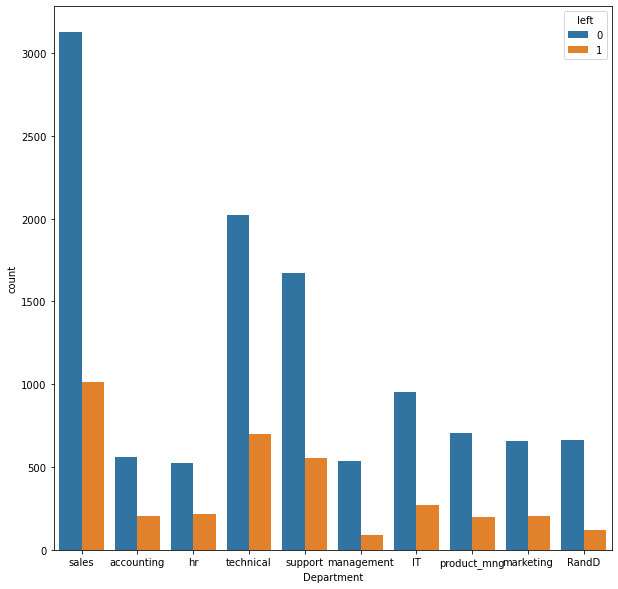

In [16]:
plt.figure(figsize=(10,10))
sns.countplot('Department',hue='left',data=data)
##As we can see the sales department employee has more attrition 

C:\Users\MASTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_accident', ylabel='count'>

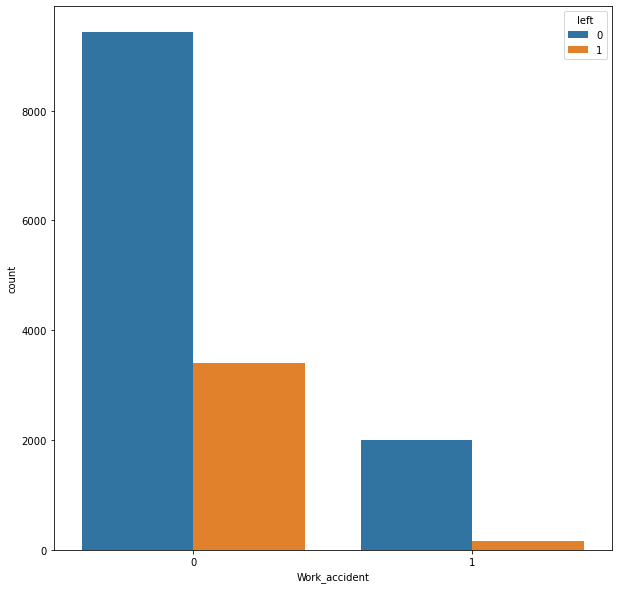

In [17]:
plt.figure(figsize=(10,10))
sns.countplot('Work_accident',hue='left',data=data)
#we can identifie that employee who does not had work accident have more no of attrition

C:\Users\MASTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

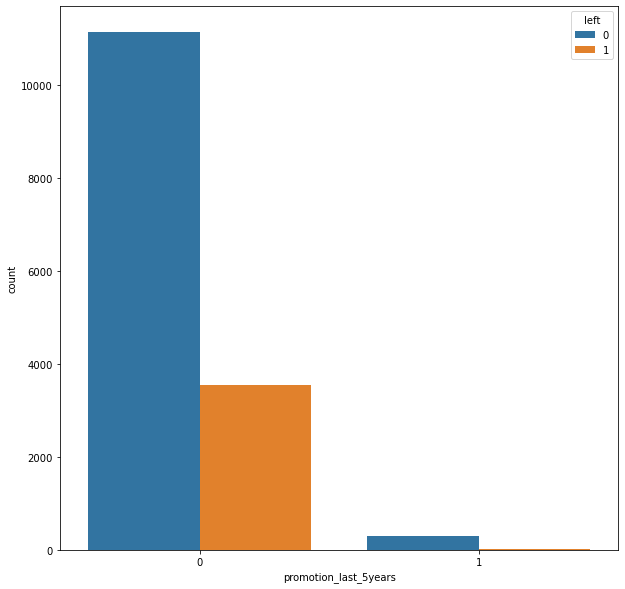

In [18]:
plt.figure(figsize=(10,10))
sns.countplot('promotion_last_5years',hue='left',data=data)
#we can identifie that employee's who did not got promotion in last 5 years has more no of attrition

C:\Users\MASTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_project', ylabel='count'>

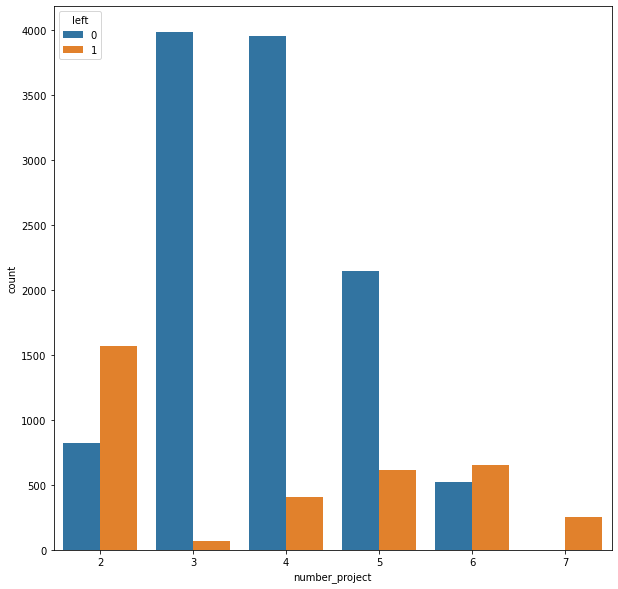

In [19]:
plt.figure(figsize=(10,10))
sns.countplot('number_project',hue='left',data=data)
#we can identifie that employee's who got 2 or less than 2 projects has more number of attrition

C:\Users\MASTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

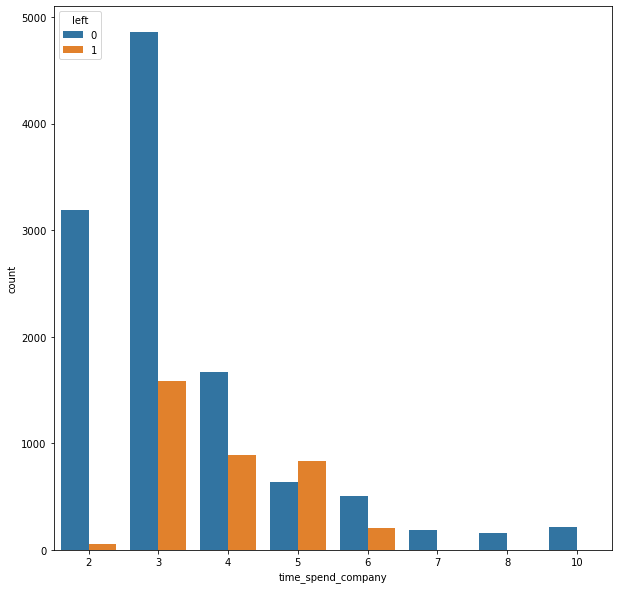

In [20]:
plt.figure(figsize=(10,10))
sns.countplot('time_spend_company',hue='left',data=data)
#we can identifie that employee's who spent time between 3 to 6 has more no of attrition

C:\Users\MASTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sat_band', ylabel='count'>

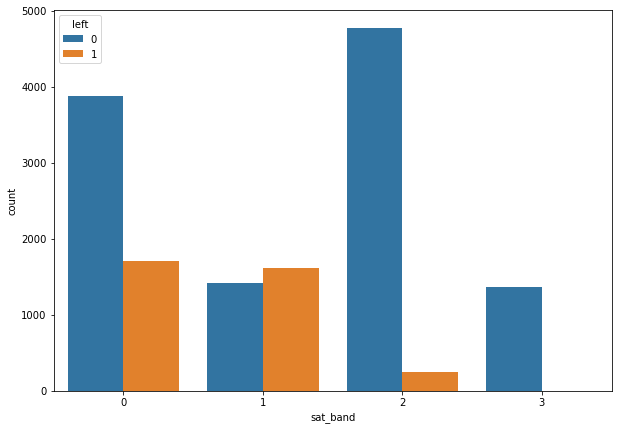

In [21]:
#satisfaction_level start from 0.0 to 1.0 
data['sat_band']=0
data.loc[(data['satisfaction_level']>=0.0) & (data['satisfaction_level']<=0.25),'sat_band']=0
data.loc[(data['satisfaction_level']>0.25) & (data['satisfaction_level']<=0.50),'sat_band']=1
data.loc[(data['satisfaction_level']>0.50) & (data['satisfaction_level']<=0.75),'sat_band']=2
data.loc[(data['satisfaction_level']>0.92),'sat_band']=3
data[['satisfaction_level','sat_band']].head()
plt.figure(figsize=(10,7))
sns.countplot('sat_band',hue='left',data=data)
# we can identifie that employee's who rated between 0.0 to 0.75 has more attrition


C:\Users\MASTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_band', ylabel='count'>

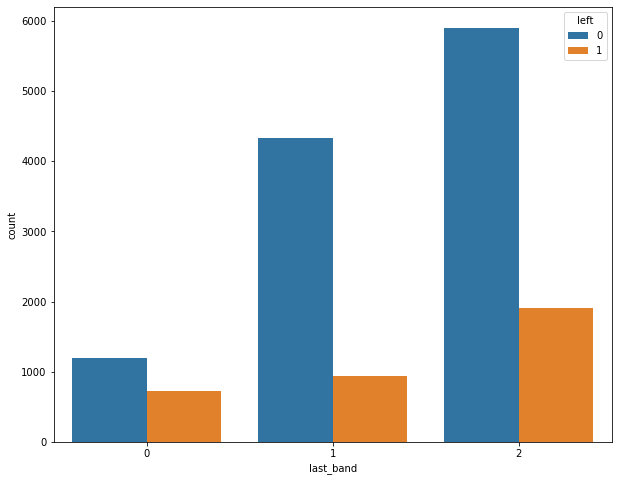

In [22]:

data['last_band']=0
data.loc[(data['last_evaluation']>=0) & (data['last_evaluation']<=0.5),'last_band']=0
data.loc[(data['last_evaluation']>0.5) & (data['last_evaluation']<=0.7),'last_band']=1
data.loc[(data['last_evaluation']>0.7) & (data['last_evaluation']<=1.0),'last_band']=2
data[['last_evaluation','last_band']].head()
plt.figure(figsize=(10,8))
sns.countplot('last_band',hue='left',data=data)
#we can identifie the employee's who got rating more than 0.7 have more attrition

C:\Users\MASTER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

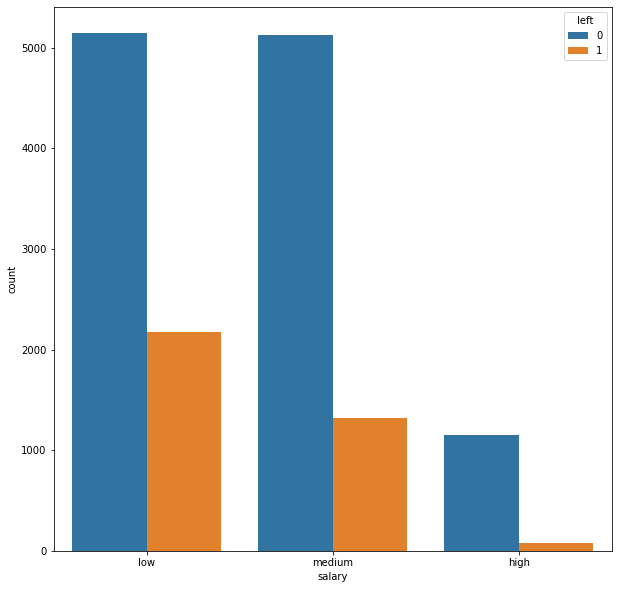

In [23]:
plt.figure(figsize=(10,10))
sns.countplot('salary',hue='left',data=data)
#It can be clearly seen that most of the employees who left the job were earning low income or medium income 
#and very less proportion of employees are there who left their job and were earning hign income.
#This implies that Salary is a major factor in determining the Employee Retention

<AxesSubplot:>

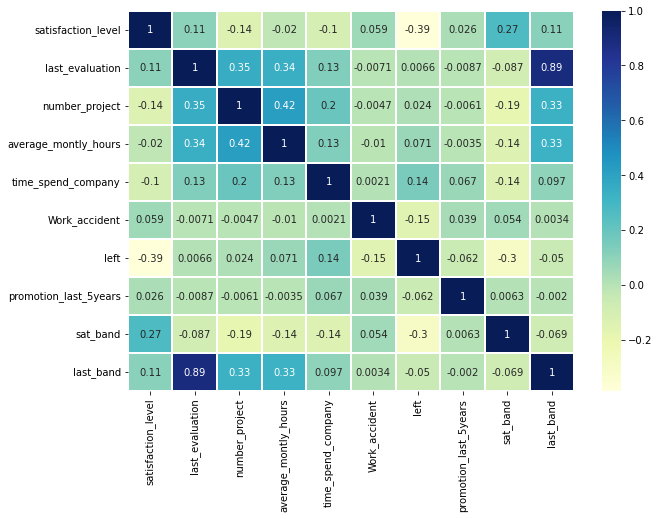

In [24]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu",linewidths=0.2)
#3 negative correlation – satisfaction level, work accident and promotion last 5 year(negligible)


In [25]:
data["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [26]:
stay_sample=stay.sample(n=3571)#taking sample values from stay 
new=pd.concat([stay_sample,lt],axis=0)

In [27]:
new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
11908,0.67,0.39,2,207,7,0,0,0,sales,medium
10605,0.61,0.75,3,140,3,0,0,0,RandD,low
7935,0.86,0.81,3,232,4,0,0,0,RandD,low
10404,0.54,0.61,2,264,3,0,0,0,sales,medium
7512,0.81,0.62,4,197,3,0,0,0,hr,low


In [28]:
new.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [29]:
new["left"].value_counts()

0    3571
1    3571
Name: left, dtype: int64

In [30]:
new.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.658443,0.713436,3.791375,198.33436,3.395407,0.169420,0.027443
1,0.440098,0.718113,3.855503,207.41921,3.876505,0.047326,0.005321


In [31]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['Department','salary']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(new[col])
    new[col] = label_encoder.transform(new[col])
x=new.drop(columns=["left"],axis=1)
y=new["left"]
print(x)
print("........................................................")
print(y)

       satisfaction_level  last_evaluation  number_project  \
11908                0.67             0.39               2   
10605                0.61             0.75               3   
7935                 0.86             0.81               3   
10404                0.54             0.61               2   
7512                 0.81             0.62               4   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  \
11908                   207                   7              0   
10605                   140                   3              0   
7935                    232                   4          

In [32]:
new.head()
new['Department'].unique()


array([7, 1, 3, 8, 9, 5, 2, 0, 4, 6])

In [33]:
new['salary'].unique()

array([2, 1, 0])

In [34]:
print(object_cols)
print(new)

['Department', 'salary']
       satisfaction_level  last_evaluation  number_project  \
11908                0.67             0.39               2   
10605                0.61             0.75               3   
7935                 0.86             0.81               3   
10404                0.54             0.61               2   
7512                 0.81             0.62               4   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
11908                   207                   7              0     0   
10605                   140                   3              0     0   
7935          

# Importing all the necessary packages to use the various classification algorithms

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier#for using Decision Tree Algoithm  
from sklearn.metrics import accuracy_score  #for checking the model accuracy

# Spliting data into training data and test data¶

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=2)

In [37]:
print(x.shape,x_train.shape,x_test.shape)

(7142, 9) (5713, 9) (1429, 9)


# Logistic Regression

In [38]:
model=LogisticRegression()
#training the logistic regression model with training data
model.fit(x_train, y_train)#fit function is use relation between this features that are present in xtrain and corressponding taget

C:\Users\MASTER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
#accuracy on training data
x_train_prediction= model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print((training_data_accuracy)*100)

75.21442324523018


In [40]:
x_test_prediction= model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print((test_data_accuracy)*100)

73.96780965710286


LogisticRegression is giving good accuracy value . We will continue to check the accuracy for different models.

# SVM Regression

In [41]:
model = svm.SVC() #select the algorithm
model.fit(x_train ,y_train) # we train the algorithm with the training data and the training output
prediction=model.predict(x_test) #now we pass the testing data to the trained algorithm
print(accuracy_score(y_test,prediction)*100) #now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

66.41007697690694


In [42]:
model.fit(x_test ,y_test) 
prediction=model.predict(x_train)
print(accuracy_score(y_train,prediction)*100)

65.1671626115876


# DecisionTreeClassifier¶

In [43]:
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train ,y_train) # we train the algorithm with the training data and the training output
prediction=DT_model.predict(x_train)#now we pass the testing data to the trained algorithm
#print(prediction)
print((accuracy_score(y_train,prediction))*100)

100.0


In [44]:
prediction=DT_model.predict(x_test)
print((accuracy_score(y_test,prediction))*100)

95.10146955913225


In [45]:
#here giving a random data from 1.satisfaction_level,2.last_evaluation,3.number_project,4.average_montly_hours,5.
#5.time_spend_company,6.Work_accident,7.promotion_last_5years,8.Department,9.salary
input_data=(0.73,0.94,4,262,3,0,1,8,1) 

In [60]:
import numpy as np
#change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy arraky as we are predicting for only on instance
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print("working in a company")
else:
    print("left the company")


[1]
left the company
